In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
% matplotlib inline

# Load the training data

In [20]:
import random
n = 40428967
sample_size = 500000
skip_rows = sorted (random.sample(range(1,n),n-sample_size ))
parse_date = lambda x : pd.datetime.strptime(x, '%y%m%d%H')

In [21]:
#train = pd.read_csv('./AvazuData/train', skiprows = skip_rows);
#train.to_csv("/Users/song/Documents/TDI/AvazuData/train_sample",index = False);

In [22]:
train_data= pd.read_csv('./AvazuData/train_sample',parse_dates = ['hour'],date_parser = parse_date)

In [90]:
train_data.head()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,...,weekday,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
0,0,1010,1,4,0,21665,320,50,2493,3,...,1,-2447894178621803513,6547665460165793105,4045818228189648048,1273408985629166695,-4913284609205845682,7311610578932947730,8603197806513259809,-8305331947480257165,3059867221658235617
1,0,1005,0,1,0,19950,320,50,1800,3,...,1,-7858344234859841529,5815798659525914083,-5618857152714448778,-6984991608567819992,-4913284609205845682,5662079892383377849,-3927288400311634280,-7915626649333737236,-7077687507477935655
2,1,1005,0,1,0,17653,300,250,1994,2,...,1,8083323643249611807,-1356195605062401514,3610367689771458009,-6984991608567819992,-4913284609205845682,5662079892383377849,-3927288400311634280,-3114403818047131295,8481974256871578379
3,0,1005,0,1,0,20596,320,50,2161,0,...,1,-5493209717593813718,-3913137258130572991,-5618857152714448778,-6984991608567819992,-4913284609205845682,5662079892383377849,-3927288400311634280,4827142726854405962,3832708443655177229
4,0,1005,0,1,0,20362,320,50,2333,0,...,1,8322598177245735866,4061829969198138138,3610367689771458009,-6984991608567819992,-4913284609205845682,5662079892383377849,-3927288400311634280,4851623831301235774,-6945890969354629282


In [91]:
train_data.columns

Index(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'weekday', 'site_id_int', 'site_domain_int', 'site_category_int',
       'app_id_int', 'app_domain_int', 'app_category_int', 'device_id_int',
       'device_ip_int', 'device_model_int'],
      dtype='object')

# Part 1:  Data Cleaning:
Will perform the following activities:
*  Shape of the train test sets
* Check for NaNs and drop them(if any)
*  Check for outliners and drop them(if any)
* Type conversion of relevant fields

In [92]:
train_data.isnull().sum().sort_values(ascending= False)

device_model_int     0
device_ip_int        0
C1                   0
banner_pos           0
device_type          0
device_conn_type     0
C14                  0
C15                  0
C16                  0
C17                  0
C18                  0
C19                  0
C20                  0
C21                  0
hour_of_day          0
weekday              0
site_id_int          0
site_domain_int      0
site_category_int    0
app_id_int           0
app_domain_int       0
app_category_int     0
device_id_int        0
click                0
dtype: int64

In [93]:
train_data.dtypes

click                int64
C1                   int64
banner_pos           int64
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
hour_of_day          int64
weekday              int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_id_int        int64
device_ip_int        int64
device_model_int     int64
dtype: object

In [94]:
train_data.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,...,weekday,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
count,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
mean,0.169896,1004.969464,0.287628,1.01657,0.331670,18828.368056,318.846856,59.976524,2111.072428,1.432826,...,2.601482,-4.187605e+17,3.544174e+18,-1.389384e+17,-4.801685e+18,-4.033914e+18,5.025865e+18,-3.235290e+18,7.442134e+16,1.460812e+15
std,0.375542,1.101059,0.506654,0.53221,0.855359,4975.609596,20.987724,46.981213,611.049494,1.326621,...,1.727471,3.936262e+18,4.343971e+18,4.314578e+18,4.105533e+18,3.344581e+18,3.403433e+18,2.685966e+18,5.311452e+18,5.395693e+18
min,0.000000,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,...,0.000000,-9.215524e+18,-9.217663e+18,-9.193535e+18,-9.216400e+18,-8.895174e+18,-8.541390e+18,-9.223285e+18,-9.223322e+18,-9.219308e+18
25%,0.000000,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,...,1.000000,-2.447894e+18,1.456115e+18,-5.618857e+18,-6.984992e+18,-4.913285e+18,5.662080e+18,-3.927288e+18,-4.503550e+18,-4.790483e+18
50%,0.000000,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,...,2.000000,-1.871012e+18,5.366336e+18,-6.166310e+17,-6.984992e+18,-4.913285e+18,5.662080e+18,-3.927288e+18,1.170840e+17,1.791014e+17
75%,0.000000,1005.000000,1.000000,1.00000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,...,4.000000,1.427277e+18,6.547665e+18,4.045818e+18,-4.178975e+18,-4.913285e+18,5.662080e+18,-3.927288e+18,4.738488e+18,4.088537e+18
max,1.000000,1012.000000,7.000000,5.00000,5.000000,24044.000000,1024.000000,1024.000000,2757.000000,3.000000,...,6.000000,9.215585e+18,9.216435e+18,8.467417e+18,9.217200e+18,8.774785e+18,9.162321e+18,9.223199e+18,9.223264e+18,9.218497e+18


In [95]:
for column in list(train_data.columns):
    print('%s have %d uniques values'%(column,train_data[column].nunique()))

click have 2 uniques values
C1 have 7 uniques values
banner_pos have 7 uniques values
device_type have 5 uniques values
device_conn_type have 4 uniques values
C14 have 2134 uniques values
C15 have 8 uniques values
C16 have 9 uniques values
C17 have 416 uniques values
C18 have 4 uniques values
C19 have 66 uniques values
C20 have 159 uniques values
C21 have 60 uniques values
hour_of_day have 24 uniques values
weekday have 7 uniques values
site_id_int have 2282 uniques values
site_domain_int have 2375 uniques values
site_category_int have 21 uniques values
app_id_int have 2477 uniques values
app_domain_int have 165 uniques values
app_category_int have 25 uniques values
device_id_int have 79592 uniques values
device_ip_int have 314348 uniques values
device_model_int have 4611 uniques values


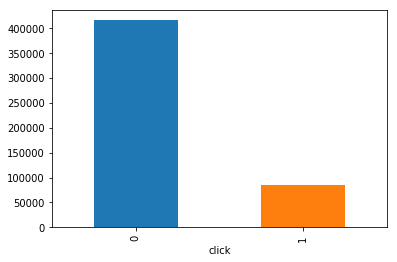

In [96]:
train_data.groupby('click').size().plot.bar()

0    0.830104
1    0.169896
Name: click, dtype: float64

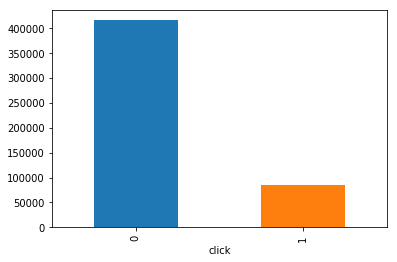

In [97]:
train_data.groupby('click').size().plot(kind = "bar")
total= train_data.shape[0]
CTR = train_data['click'].value_counts()/total
CTR

# Part 2: Exploratory Data Analysis( EDA) : including data visualization and   feature engineering



In [ ]:
train_data.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

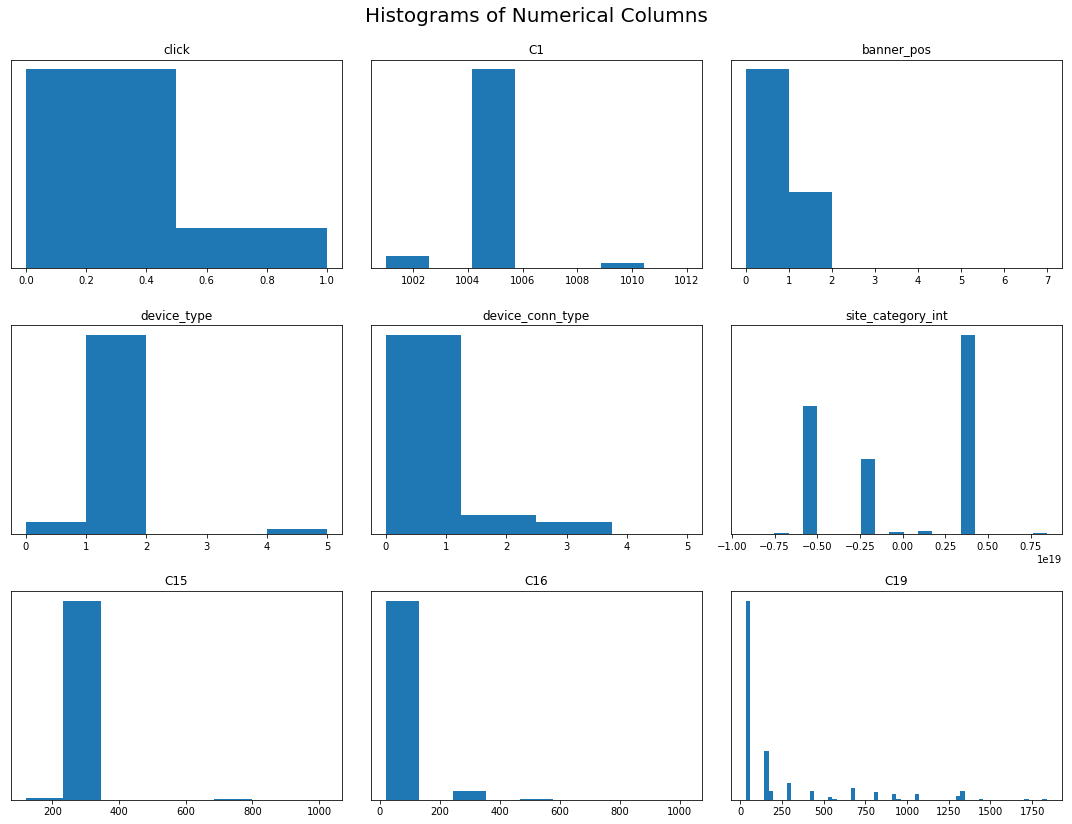

In [98]:
cols = ['click','C1','banner_pos','device_type','device_conn_type','site_category_int','C15','C16','C19']
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histograms of Numerical Columns',fontsize = 20)
for i,col in enumerate(cols):
    plt.subplot(3,3,i+1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(col)
    vals = train_data[col].nunique()
    plt.hist(train_data[col],bins = vals)
plt.tight_layout(rect = [0,0.03,1,0.95])

### 1. Does time  effect the CTR? 
Split the datetime filed to 
* hour
* day of week

In [99]:
train_data['hour_of_day'] = train_data['hour'].apply(lambda x : x.hour)

KeyError: 'hour'

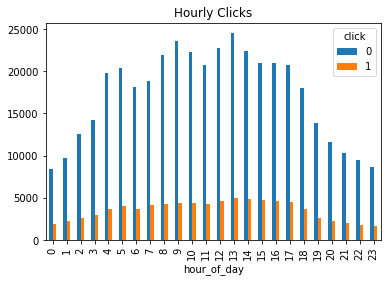

In [31]:
train_data.groupby(['hour_of_day','click']).size().unstack().plot(kind ="bar", stacked = False, 
                                                                  title = "Hourly Clicks")

In [32]:
train_data[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending = False);

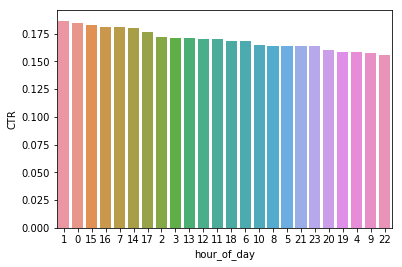

In [33]:
train_data_clicks = train_data[train_data['click']==1]
df_hour = train_data_clicks[['hour_of_day','click']].groupby('hour_of_day',as_index = False).count()
impression = train_data[['hour_of_day','click']].groupby('hour_of_day',as_index =False).count()
impression.rename(columns = {'click':'impression'}, inplace =True)
df_hour = pd.merge(df_hour,impression, on='hour_of_day')
df_hour['CTR'] = df_hour['click']/df_hour['impression']
df_hour = df_hour.sort_values(ascending = False, by = 'CTR')
df_hour
hour_list = df_hour['hour_of_day'].tolist()
sns.barplot(y='CTR', x = 'hour_of_day',data = df_hour, order = hour_list)

In [34]:
train_data['weekday'] = train_data['hour'].apply(lambda x : x.dayofweek)
train_data['whichWeekday'] = train_data['hour'].apply(lambda x : x.weekday_name)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


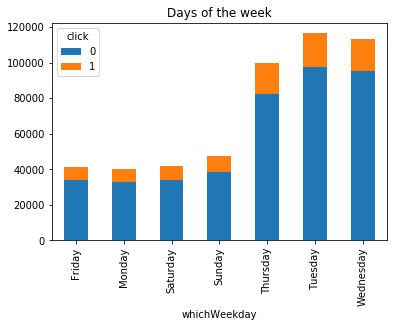

In [35]:
train_data.groupby(['whichWeekday','click']).size().unstack().plot(kind = 'bar', stacked = True, title = "Days of the week")

In [36]:
train_data_clicks['whichWeekday'] = train_data_clicks['hour'].apply(lambda x : x.weekday_name)
df_weekday = train_data_clicks[['whichWeekday','click']].groupby(['whichWeekday'],as_index =False).count()
df_impression =train_data[['whichWeekday','click']].groupby(['whichWeekday'],as_index =False).count()
df_impression.rename(columns = {'click':'impression'},inplace =True)
df_weekday = pd.merge(df_weekday, df_impression, on = 'whichWeekday')
df_weekday['CTR'] = df_weekday['click']/df_weekday['impression']
df_weekday=df_weekday.sort_values(ascending = False, by = 'CTR')
df_weekday

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,whichWeekday,click,impression,CTR
2,Saturday,7804,41774,0.186815
3,Sunday,8583,47208,0.181812
1,Monday,7210,39853,0.180915
0,Friday,7347,41434,0.177318
4,Thursday,17519,99974,0.175236
5,Tuesday,18780,116549,0.161134
6,Wednesday,17705,113208,0.156394


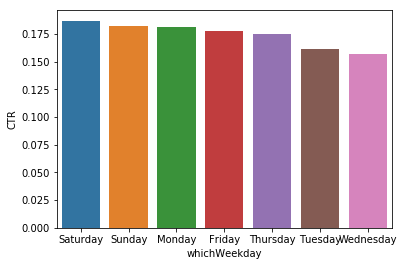

In [37]:
list_of_days = df_weekday['whichWeekday'].tolist()
sns.barplot(y = 'CTR', x = 'whichWeekday',data =df_weekday, order = list_of_days)

### Conclusion: 

### 2. Does Banner Position effect CTR?

In [38]:
train_data['banner_pos'].unique()

array([1, 0, 5, 7, 2, 4, 3])

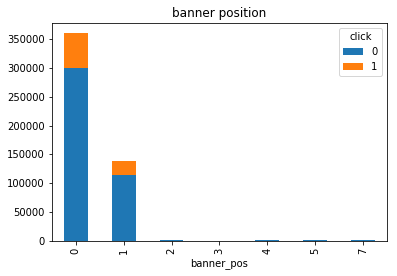

In [39]:
groupby_bannerPos= train_data[['banner_pos','click']].groupby(['banner_pos','click'])
groupby_bannerPos.size().unstack().plot(kind = 'bar',stacked = True, title = "banner position")

Position 0 and 1 arethe most prominent banner positions

In [40]:
banner_pos_impression = train_data[['banner_pos','click']].groupby('banner_pos',as_index =False).count().sort_values('click',ascending = False)
banner_pos_impression.rename(columns = {'click':"impression"},inplace =True)
banner_pos_clicks= train_data_clicks[['banner_pos','click']].groupby('banner_pos',as_index =False).count().sort_values('click',ascending = False)
banner_pos_CTR = pd.merge(banner_pos_impression,banner_pos_clicks,on = 'banner_pos')
banner_pos_CTR['CTR'] = banner_pos_CTR['click']/banner_pos_CTR['impression']
banner_pos_CTR.sort_values(by = 'CTR',ascending = False)

,banner_pos,impression,click,CTR
2,7,542,171,0.315498
6,3,31,8,0.258065
5,5,70,16,0.228571
1,1,138835,25381,0.182814
0,0,360252,59332,0.164696
4,4,101,16,0.158416
3,2,169,24,0.142012


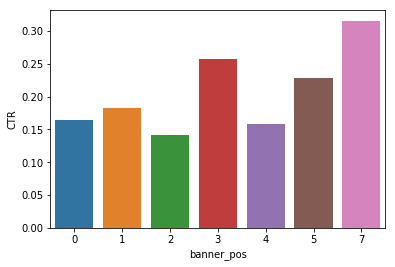

In [41]:
sns.barplot( y='CTR',x = 'banner_pos',data =banner_pos_CTR)

### Conclusion:

* Most clicks on Tuesday, then wednesday followed by Thursday

### 3. Does Device type effect CTR?

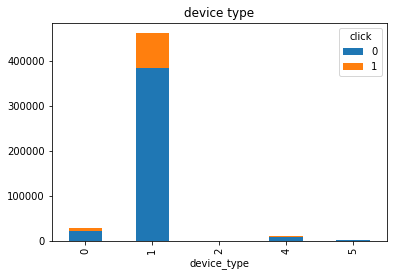

In [42]:
train_data[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind = 'bar',stacked = True,title = 'device type')


### 4. Does App Related Features effect CTR?

In [43]:
train_data[['app_category','click']].groupby('app_category').count().sort_values(by = 'click',ascending = False)

,click
app_category,
07d7df22,323195
0f2161f8,118508
cef3e649,21447
8ded1f7a,18175
f95efa07,14208
d1327cf5,1485
dc97ec06,670
09481d60,636
75d80bbe,515


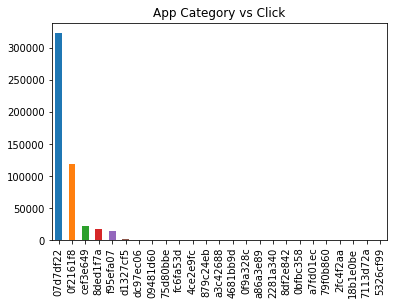

In [44]:
train_data['app_category'].value_counts().plot(kind = 'bar', title = 'App Category vs Click')

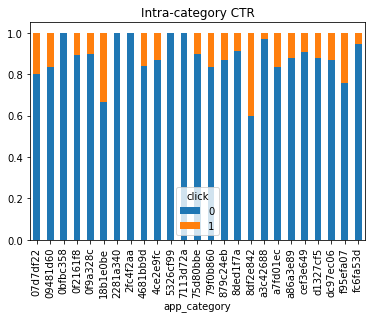

In [45]:
train_app_category = train_data.groupby(['app_category','click']).size().unstack()
train_app_category.div(train_app_category.sum(axis = 1),axis = 0).plot(kind = 'bar',stacked = True, title = 'Intra-category CTR')

### 4. Does  C1,C14-C21 features effect CTR?

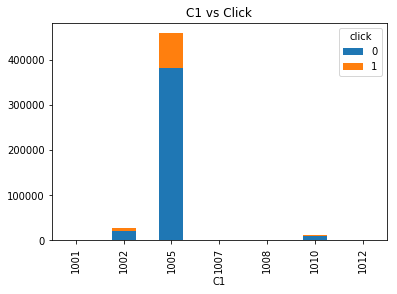

In [46]:
train_data.groupby(['C1','click']).size().unstack().plot(kind = 'bar', stacked = True, title = 'C1 vs Click')

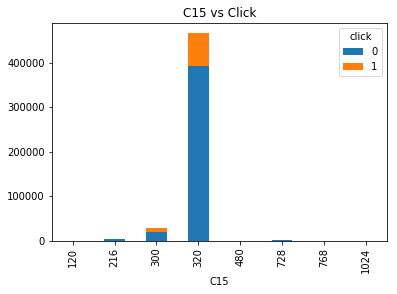

In [47]:
train_data.groupby(['C15','click']).size().unstack().plot(kind = 'bar', stacked = True,title = 'C15 vs Click')

# Part 3:  Model Training and Model Evaluation

### 1. Prepare data to feed in the data pipeline

In [49]:
list(train_data.columns)

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'hour_of_day',
 'weekday',
 'whichWeekday']

In [50]:
train_data = train_data.drop(['id','hour','whichWeekday'], axis = 1)
list(train_data.columns)

['click',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'hour_of_day',
 'weekday']

#### 2.  Hashing

In [103]:
cols = ["C1","banner_pos","site_category","app_category","device_type","device_conn_type","C14","C15","C16","C17","C18","C19","C20","C21", "hour_of_day",'weekday']
cols2 = ['C1','banner_pos','site_id','site_domain','site_category','app_id','app_domain','app_category','device_type','device_conn_type','C14','C15','C16','C17','C18','C19','C20','C21','hour_of_day','weekday']
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features = 2**20, input_type = 'string')
#train_data = train_data.sample(frac = 0.1,random_state = 1)
X = train_data[cols]
y = train_data['click']
X = fh.transform(np.asarray(X.astype(str)))

KeyError: "['site_category' 'app_category'] not in index"

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

## Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
C = [0.01,0.05,0.1,0.5]
penalty = ['l1','l2']
param_grid = {'C': C, 'penalty' : penalty}
lr = LogisticRegression( fit_intercept=True, max_iter=100, n_jobs=1)
grid_search = GridSearchCV(estimator = lr, param_grid =param_grid, scoring = 'roc_auc', cv =5, refit = True,verbose = 4 )
grid_search.fit(X_train,y_train)
print('Best parameters found')
grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.701, total= 1.1min
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.702, total= 1.2min
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.704, total=  59.2s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.699, total=  59.8s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

In [ ]:
lr_final = grid_search.best_estimator_
y_prediction = lr_final.predict_proba(X_test)[:,1]
print ("Logistic Regression \n ROC_ AUC : %f \n" %roc_auc_score(y_test,y_prediction))

# GBDT + LG

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 10, subsample = 0.6, max_depth = 7, min_samples_split = 900)

In [95]:
gbdt.fit(X_train,y_train)
train_new_feature = gbdt.apply(X_train)
test_new_feature=gbdt.apply(X_test)
train_new_feature = train_new_feature.reshape(-1,50)
test_new_feature = test_new_feature.reshape(-1,50)
enc = OneHotEncoder()
enc.fit(train_new_feature)
train_new_feature2 = np.array(enc.transform(train_new_feature2).toarray())
test_new_feature2 = np.array(enc.transform(test_new_feature2).toarray())

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
lr.fit(train_new_feature2,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_prediction = lr_classify.predict_proba(test_new_feature2)[ :, 1]
print('GBDT+ Logistic Regression')
print ('Logloss:', log_loss(y_test,y_prediction))

GBDT+ Logistic Regression
Logloss: 0.5987285121825755
